In [2]:
using Laplacians

/Users/JeffreyLai/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
using ProgressMeter

In [31]:
include("../src/fractalPrim.jl")

fractalPrim (generic function with 2 methods)

In [14]:
@time a = wtedChimera(1000000,17)

 11.884050 seconds (5.07 M allocations: 2.112 GB, 11.25% gc time)


1000000x1000000 sparse matrix with 7345880 Float64 entries:
	[59915  ,       1]  =  0.272787
	[602867 ,       1]  =  0.587457
	[617739 ,       1]  =  0.31276
	[696807 ,       1]  =  0.838673
	[698624 ,       1]  =  0.847646
	[717268 ,       1]  =  1.65939
	[827408 ,       1]  =  0.479514
	[920411 ,       1]  =  0.18156
	[107576 ,       2]  =  0.162825
	[185020 ,       2]  =  0.340199
	⋮
	[274530 ,  999999]  =  0.249669
	[354570 ,  999999]  =  0.591664
	[434720 ,  999999]  =  0.333689
	[673946 ,  999999]  =  0.501578
	[953999 ,  999999]  =  0.352654
	[144050 , 1000000]  =  0.259577
	[199324 , 1000000]  =  0.919392
	[427581 , 1000000]  =  0.339573
	[577680 , 1000000]  =  0.370156
	[614185 , 1000000]  =  0.17224
	[641101 , 1000000]  =  0.206113

In [15]:
@time s = makeStartPoints(a, 5)
@time t, s_cnts = fractalPrim(a, s)
@time st = compStretches(t,a);
sum(st)/nnz(a)

 19.073343 seconds (184 allocations: 1.137 GB, 2.53% gc time)
  3.670084 seconds (88 allocations: 354.342 MB, 2.84% gc time)
  2.553651 seconds (108 allocations: 614.499 MB, 8.87% gc time)


22.88747055913041

In [10]:
for i in 1:length(s)
    @printf("Start Point: %d, Count: %d\n", s[i].val, s_cnts[i])
end

Start Point: 652932, Count: 999999
Start Point: 34454, Count: 0
Start Point: 688667, Count: 0
Start Point: 635276, Count: 0
Start Point: 392186, Count: 0
Start Point: 573505, Count: 0
Start Point: 33493, Count: 0
Start Point: 536909, Count: 0
Start Point: 339451, Count: 0
Start Point: 636518, Count: 0
Start Point: 49399, Count: 0
Start Point: 140075, Count: 0
Start Point: 285874, Count: 0
Start Point: 74673, Count: 0
Start Point: 624210, Count: 0
Start Point: 891774, Count: 0


In [16]:
@time a = wtedChimera(10000,18)

  0.146686 seconds (52.08 k allocations: 11.820 MB)


10000x10000 sparse matrix with 23264 Float64 entries:
	[2597 ,     1]  =  0.60302
	[2738 ,     1]  =  0.158907
	[7336 ,     2]  =  0.384605
	[2451 ,     3]  =  0.182299
	[2721 ,     3]  =  0.123429
	[8618 ,     3]  =  0.148562
	[8682 ,     3]  =  1.34825
	[8352 ,     4]  =  0.22109
	[3156 ,     5]  =  0.290402
	[4144 ,     6]  =  0.390541
	⋮
	[170  ,  9996]  =  6.92385
	[6116 ,  9996]  =  0.151925
	[7485 ,  9996]  =  0.178418
	[1022 ,  9997]  =  1.20158
	[4756 ,  9997]  =  0.712036
	[7309 ,  9998]  =  0.433934
	[625  ,  9999]  =  0.153105
	[3162 ,  9999]  =  0.182547
	[8155 ,  9999]  =  0.808026
	[7599 , 10000]  =  0.262019
	[8828 , 10000]  =  0.311108

In [17]:
@time s = makeStartPoints(a, 4)
@time t, s_cnts = fractalPrim(a, s)
@time st = compStretches(t,a);
sum(st)/nnz(a)

  0.024298 seconds (112 allocations: 3.495 MB)
  0.070803 seconds (79 allocations: 2.042 MB)
  0.018331 seconds (98 allocations: 2.863 MB)


4.227172589522362

In [18]:
@time a = wtedChimera(10000,117)

  0.494601 seconds (130.66 k allocations: 27.039 MB, 23.65% gc time)


10000x10000 sparse matrix with 31096 Float64 entries:
	[10   ,     1]  =  3.25115
	[3147 ,     1]  =  7.43716
	[6437 ,     1]  =  3.95547
	[8806 ,     1]  =  2.73644
	[2560 ,     2]  =  2.56787
	[4803 ,     2]  =  2.92678
	[611  ,     3]  =  1.64504
	[4126 ,     3]  =  1.59006
	[7173 ,     3]  =  0.362711
	[2001 ,     4]  =  2.33302
	⋮
	[9563 ,  9997]  =  1.0965
	[765  ,  9998]  =  5.18425
	[2073 ,  9998]  =  3.07378
	[3230 ,  9998]  =  3.05251
	[5099 ,  9999]  =  0.0499267
	[5465 ,  9999]  =  0.500167
	[7746 ,  9999]  =  0.326326
	[1009 , 10000]  =  0.0499978
	[1861 , 10000]  =  1.74822
	[3155 , 10000]  =  1.23969
	[3632 , 10000]  =  0.119136

In [19]:
@time s = makeStartPoints(a, 4)
@time t, s_cnts = fractalPrim(a, s)
@time st = compStretches(t,a);
sum(st)/nnz(a)

  0.034783 seconds (110 allocations: 4.024 MB)
  0.013071 seconds (79 allocations: 2.229 MB)
  0.011353 seconds (99 allocations: 3.402 MB)


4.786268177280622

In [50]:
graph_size = 10000
round = 4
counts = zeros(2^round)

seeds = 10000
stretches = zeros(Float64, seeds)
@showprogress 1 "Computing..."for i in 1:seeds
    a = wtedChimera(graph_size,i)
    s = makeStartPoints(a, round)
    t, s_cnts = fractalPrim(a, s, i)
    for j in 1:length(s_cnts)
        counts[j] += s_cnts[j]
    end
    st = compStretches(t,a)
    stretches[i] = sum(st)/nnz(a)
end
println("Average stretch: ", mean(stretches))
println("Counts: ",counts)

Computing...100% Time: 0:18:08
Average stretch: 8.328617054367479
Counts: [9.8804467e7,9070.0,198133.0,150284.0,190512.0,64366.0,116066.0,117354.0,293180.0,13185.0,12125.0,1087.0,15535.0,670.0,3966.0,0.0]


In [53]:
stretches_akpw = zeros(Float64, seeds)
stretches_rp = zeros(Float64, seeds)
@showprogress 1 "Computing..."for i in 1:seeds
    a = wtedChimera(graph_size,i)
    t = akpw(a)
    st = compStretches(t,a)
    stretches_akpw[i] = sum(st)/nnz(a)
    t = randishPrim(a)
    st = compStretches(t,a)
    stretches_rp[i] = sum(st)/nnz(a)
end
println("AKPW Average stretch: ", mean(stretches_akpw))
println("Randish Prim Average stretch: ", mean(stretches_rp))

Computing...100% Time: 0:22:39
AKPW Average stretch: 4.328587036879423
Randish Prim Average stretch: 8.332118393998282


In [29]:
t, s_cnts = fractalPrim(a, s, 7)
st = compStretches(t,a)


12.113090165494556

In [44]:
println("Average stretch: ", mean(stretches))
println("Counts: ",counts)

Average stretch: 0.0006358544196469361
Counts: [2.27324746e8,27927.0,384366.0,379733.0,437606.0,111538.0,330453.0,264003.0,644306.0,50434.0,43623.0,8829.0,33512.0,680.0,5237.0,0.0]


In [48]:
sum(st)/nnz(a)

7.872260488995536

In [5]:
graph_size = 10000
round = 4
counts = zeros(2^round)
seeds = 10000

stretches_doubling = zeros(Float64, seeds)
stretches_akpw = zeros(Float64, seeds)
stretches_rp = zeros(Float64, seeds)

@showprogress 1 "Computing..."for i in 1:seeds
    a = wtedChimera(graph_size,i)
    s = makeStartPoints(a, round)
    t, s_cnts = fractalPrim(a, s, i)
    for j in 1:length(s_cnts)
        counts[j] += s_cnts[j]
    end
    st = compStretches(t,a)
    stretches_doubling[i] = sum(st)/nnz(a)
    t = akpw(a)
    st = compStretches(t,a)
    stretches_akpw[i] = sum(st)/nnz(a)
    t = randishPrim(a)
    st = compStretches(t,a)
    stretches_rp[i] = sum(st)/nnz(a)
end

Computing...100% Time: 0:31:14


LoadError: LoadError: UndefVarError: stretches not defined
while loading In[5], in expression starting on line 25

In [6]:
println("AKPW Average stretch: ", mean(stretches_akpw))
println("Randish Prim Average stretch: ", mean(stretches_rp))
println("Average stretch: ", mean(stretches_doubling))
println("Counts: ",counts)

AKPW Average stretch: 4.328587036879423
Randish Prim Average stretch: 8.334786007845537
Average stretch: 8.405144559713815
Counts: [8.5511912e7,1.631755e6,1.751022e6,614415.0,2.196982e6,684190.0,972715.0,577735.0,2.145046e6,932014.0,841881.0,474519.0,821091.0,330155.0,302678.0,201890.0]


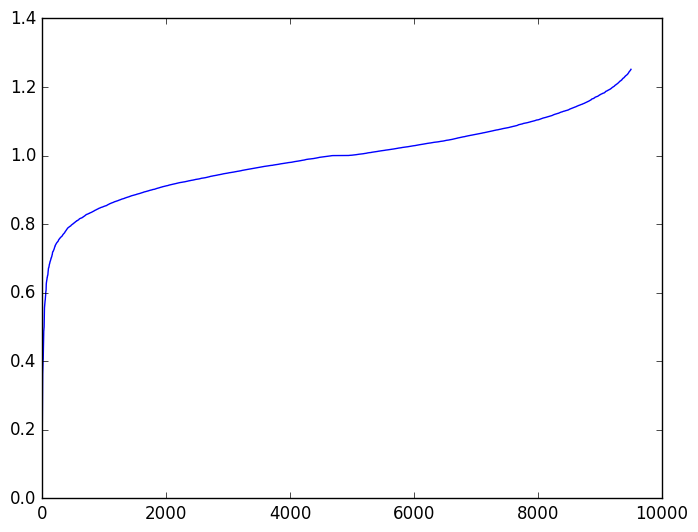

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c8bd7d0>

In [49]:
#using PyPlot
# %matplotlib notebook
rat = stretches_doubling ./ stretches_rp
rat = sort(rat)
plot(rat[1:9500])

In [50]:
rat[end-5:end]

6-element Array{Float64,1}:
  3.12315
  3.7826 
  3.86217
  6.86886
  8.11673
 34.7657 

In [33]:
graph_size = 10000
round = 4
seeds = 1000
stretches_exprv = zeros(Float64, seeds)
# stretches_akpw_unweighted = zeros(Float64, seeds)
# stretches_rp_unweighted = zeros(Float64, seeds)

@showprogress 1 "Computing..."for i in 1:seeds
    a = chimera(graph_size,i)
    s = makeUniformExpRVStartPoints(a, 4*log(graph_size), i)
    t, s_cnts = fractalPrim(a, s, i)
    st = compStretches(t,a)
    stretches_exprv[i] = sum(st)/nnz(a)
end
println("Average stretch: ", mean(stretches_exprv))
# println("Average stretch akpw: ", mean(stretches_akpw_unweighted))
# println("Average stretch randish prim: ", mean(stretches_rp_unweighted))

Computing...100% Time: 0:01:28
Average stretch: 11.888498142240154


In [11]:
chimera(1000,1)

1000x1000 sparse matrix with 7576 Float64 entries:
	[313 ,    1]  =  1.0
	[396 ,    1]  =  1.0
	[424 ,    1]  =  1.0
	[466 ,    1]  =  1.0
	[776 ,    1]  =  1.0
	[799 ,    1]  =  1.0
	[845 ,    1]  =  1.0
	[955 ,    1]  =  1.0
	[970 ,    1]  =  1.0
	[191 ,    2]  =  1.0
	⋮
	[804 ,  999]  =  1.0
	[820 ,  999]  =  1.0
	[156 , 1000]  =  1.0
	[286 , 1000]  =  1.0
	[310 , 1000]  =  1.0
	[503 , 1000]  =  1.0
	[554 , 1000]  =  1.0
	[684 , 1000]  =  1.0
	[728 , 1000]  =  1.0
	[959 , 1000]  =  1.0
	[981 , 1000]  =  1.0